In [1]:
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from matplotlib import cm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from adspy_shared_utilities import load_crime_dataset
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\asif\Python Scripts\Combined Trajectory Reading\Combined Trajectory_Label_Geolife\singleuseranalysis")
dfsegments = pd.read_table('user141.csv', sep=',')
df = dfsegments.copy()

In [3]:
df
#df1 = df1.where(df1['Transportation_Mode'].isin(['walk','car','bus','taxi','bike'])).dropna() # 
#trajectorydup = trajectorydup.where(trajectorydup['time_delta'] > 0) # remove all points whose date-time value is not is oreder, or 
#trajectorydup.groupby(['userid','trip_id']).Transportation_Mode.apply(lambda x: x.ne(x.shift(1)).cumsum())

,lat,long,date,time,userid,date_time,Transportation_Mode,col,row,time_delta,...,segmentid,Vincenty_distance,velocity,acceleration,velocity_rate,jerk,acc_rate,bearing,bearing_rate,rate_bearing_rate
0,39.979547,116.306813,2011-08-29,10:13:15,141,2011-08-29 10:13:15,walk,6.0,11.0,1.0,...,1,1.551677,1.551677,0.550164,0.354561,-1.017630,-1.849685,33.297150,-5.088421,14.341677
1,39.979558,116.306823,2011-08-29,10:13:16,141,2011-08-29 10:13:16,walk,6.0,11.0,1.0,...,1,2.101840,2.101840,-0.467466,-0.222408,0.732307,-1.566547,28.208729,9.253256,-33.768900
2,39.979575,116.306835,2011-08-29,10:13:17,141,2011-08-29 10:13:17,walk,6.0,11.0,1.0,...,1,1.634375,1.634375,0.264841,0.162044,-0.583601,-2.203589,37.461985,-24.515644,65.626818
3,39.979587,116.306847,2011-08-29,10:13:18,141,2011-08-29 10:13:18,walk,6.0,11.0,1.0,...,1,1.899216,1.899216,-0.318760,-0.167838,0.610088,-1.913941,12.946341,41.111174,-68.108535
4,39.979603,116.306852,2011-08-29,10:13:19,141,2011-08-29 10:13:19,walk,6.0,11.0,1.0,...,1,1.580456,1.580456,0.291328,0.184331,-0.803232,-2.757142,54.057515,-26.997361,46.948214
5,39.979612,116.306867,2011-08-29,10:13:20,141,2011-08-29 10:13:20,walk,6.0,11.0,1.0,...,1,1.871784,1.871784,-0.511904,-0.273485,0.847474,-1.655532,27.060155,19.950854,-17.985533
6,39.979627,116.306877,2011-08-29,10:13:21,141,2011-08-29 10:13:21,walk,6.0,11.0,1.0,...,1,1.359879,1.359879,0.335569,0.246764,-0.479342,-1.428445,47.011008,1.965321,-17.644538
7,39.979635,116.306888,2011-08-29,10:13:22,141,2011-08-29 10:13:22,walk,6.0,11.0,1.0,...,1,1.695449,1.695449,-0.143773,-0.084799,0.178299,-1.240140,48.976329,-15.679217,3.345752
8,39.979645,116.306903,2011-08-29,10:13:23,141,2011-08-29 10:13:23,walk,6.0,11.0,1.0,...,1,1.551676,1.551676,0.034526,0.022251,-0.325328,-9.422796,33.297112,-12.333465,-8.630183
9,39.979657,116.306913,2011-08-29,10:13:24,141,2011-08-29 10:13:24,walk,6.0,11.0,1.0,...,1,1.586202,1.586202,-0.290802,-0.183332,1.785823,-6.141028,20.963648,-20.963648,26.797292


In [4]:
df1 = df.where(df['segmentid']!=df['segmentid'].shift(1)).dropna()

In [5]:
df1

,lat,long,date,time,userid,date_time,Transportation_Mode,col,row,time_delta,...,segmentid,Vincenty_distance,velocity,acceleration,velocity_rate,jerk,acc_rate,bearing,bearing_rate,rate_bearing_rate
0,39.979547,116.306813,2011-08-29,10:13:15,141.0,2011-08-29 10:13:15,walk,6.0,11.0,1.0,...,1.0,1.551677,1.551677,5.501639e-01,3.545609e-01,-1.017630,-1.849685e+00,33.297150,-5.088421e+00,14.341677
4782,39.991755,116.309247,2011-09-02,11:00:06,141.0,2011-09-02 11:00:06,subway,6.0,12.0,1.0,...,2.0,0.936172,0.936172,-1.088423e-02,-1.162632e-02,-0.174173,1.600235e+01,171.288476,8.711524e+00,-8.711524
4787,39.976225,116.337132,2011-09-02,11:23:44,141.0,2011-09-02 11:23:44,subway,7.0,11.0,1.0,...,1.0,10.396209,10.396209,-9.930727e+00,-9.552258e-01,10.943352,-1.101969e+00,33.111536,3.338015e+01,-251.177107
4847,39.975575,116.336827,2011-09-02,11:24:48,141.0,2011-09-02 11:24:48,walk,7.0,11.0,1.0,...,2.0,0.573136,0.573136,1.273253e-01,2.221556e-01,-0.262618,-2.062574e+00,165.670813,-2.313443e+01,11.620013
4855,39.975452,116.337508,2011-09-02,12:11:01,141.0,2011-09-02 12:11:01,walk,7.0,11.0,1.0,...,1.0,1.471056,1.471056,3.431064e+00,2.332382e+00,-1.999719,-5.828277e-01,104.627203,-2.241142e+02,219.775017
5746,39.984832,116.327330,2011-09-03,04:34:10,141.0,2011-09-03 04:34:10,bus,7.0,11.0,1.0,...,2.0,1.146264,1.146264,-3.592058e-02,-3.133709e-02,0.045009,-1.253008e+00,-14.327327,1.432733e+01,-21.604746
5883,39.986000,116.299078,2011-09-03,04:47:15,141.0,2011-09-03 04:47:15,walk,5.0,11.0,1.0,...,3.0,1.470844,1.470844,1.153400e-01,7.841756e-02,3.156005,2.736262e+01,-75.370624,5.440875e+01,16.076952
6021,39.987800,116.300507,2011-09-03,05:13:18,141.0,2011-09-03 05:13:18,walk,6.0,11.0,1.0,...,1.0,2.385750,2.385750,6.230414e-02,2.611511e-02,-1.483464,-2.381004e+01,-134.388530,5.311812e+01,164.389286
7009,39.983732,116.303922,2011-09-03,06:22:44,141.0,2011-09-03 06:22:44,subway,6.0,11.0,1.0,...,2.0,1.063008,1.063008,-2.088698e-01,-1.964894e-01,0.846665,-4.053552e+00,69.550280,2.044972e+01,27.755751
7226,39.974913,116.333420,2011-09-03,06:46:52,141.0,2011-09-03 06:46:52,walk,7.0,11.0,1.0,...,3.0,2.497784,2.497784,6.915989e-01,2.768850e-01,-2.402868,-3.474367e+00,-121.340000,1.089272e+01,70.859336


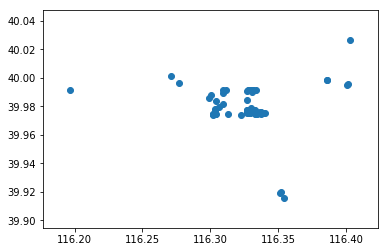

In [6]:
plt.figure()
plt.scatter(df1['long'], df1['lat']) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

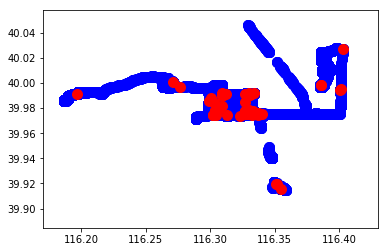

In [7]:
fig = plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(df1['long'], df1['lat'], s=100, c='red', label='Change Points')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(df['long'], df['lat'], s=100, c='blue', label='Normal Points')
plt.scatter(df1['long'], df1['lat'], s=100, c='red', label='Change Points')


In [8]:
fig.savefig('changepoints.png')

In [9]:
len(df1)

79

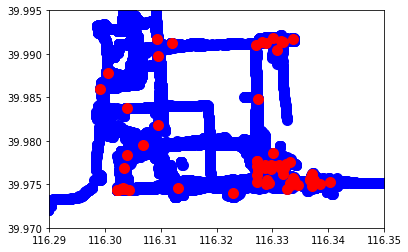

In [10]:
plt.axis([116.29,116.35,39.97,39.995])
plt.scatter(df['long'], df['lat'], s=100, c='blue', label='Normal Points')
plt.scatter(df1['long'], df1['lat'], s=100, c='red', label='Change Points')

In [14]:
df1.to_csv(r'dfchangepoint.csv',index=False)

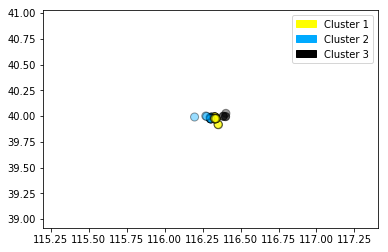

In [77]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#from adspy_shared_utilities import plot_labelled_scatter

#X, y = make_blobs(random_state = 10)
X = df1[['long','lat']].as_matrix()
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [75]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 116.29, 116.35 #
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # 39.97,39.995 #

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()

In [78]:
centers = kmeans.cluster_centers_

In [79]:
centers

array([[116.33269587,  39.97528522],
       [116.29722591,  39.98208636],
       [116.39545033,  40.00279067]])